In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns",None)

# Importing the Data

In [2]:
# delimter perticular this code is used to remove extra spaces from the each and evey value of the data.
df1 = pd.read_csv(r"C:\Users\dell\Downloads\Fraud.csv")
df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [3]:
cols = list(df1.columns)
cols

['step',
 'type',
 'amount',
 'nameOrig',
 'oldbalanceOrg',
 'newbalanceOrig',
 'nameDest',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

# Rearranged the column based on X and Y variable

In [4]:
cols = list(df1.columns)


last_col = cols.pop(-1)  # Removing the last column name
cols.insert(-1, last_col)  # Inserting the last column name at the second last position

# Reordering the DataFrame columns
df1 = df1[cols]

df1.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
df1.shape

(6362620, 11)

# Created a copy of the dataframe ( for Pre - processing)
- So that orignal data will not get affected

In [6]:
df2 = pd.DataFrame.copy(df1)

# Droping columns (feature selection)
- Droping "Step" column because its only number series which will not affect the model performance or prediction
- Droping "nameOrig" and "nameDest" because it contain unique value like some kind of ID which will not also not affect the model performance or prediction

In [7]:
df2.drop(["nameDest","step","nameOrig"],axis=1, inplace = True)

In [8]:
df2.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,PAYMENT,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,PAYMENT,1864.28,21249.0,19384.72,0.0,0.0,0,0
2,TRANSFER,181.00,181.0,0.00,0.0,0.0,0,1
3,CASH_OUT,181.00,181.0,0.00,21182.0,0.0,0,1
4,PAYMENT,11668.14,41554.0,29885.86,0.0,0.0,0,0


# Some basic checks 

In [9]:
df2.shape

(6362620, 8)

In [10]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   amount          float64
 2   oldbalanceOrg   float64
 3   newbalanceOrig  float64
 4   oldbalanceDest  float64
 5   newbalanceDest  float64
 6   isFlaggedFraud  int64  
 7   isFraud         int64  
dtypes: float64(5), int64(2), object(1)
memory usage: 388.3+ MB


In [11]:
df2.shape

(6362620, 8)

# Duplicate :- 97880 found to be duplicate entry. 
- Droping those duplicate because even if its a valid duplicate entry, i mean same person can do same type and amount of transaction multiple times but i consider them droping because duplicate entries wont affect my model prediction. intsted it will make it time consuming and will consume more memory space.

In [12]:
df2.duplicated().sum()

97880

In [13]:
df2.drop_duplicates(inplace = True)
print(df2.shape)

(6264740, 8)


In [14]:
df2.type.value_counts()

type
CASH_OUT    2237441
PAYMENT     2053676
CASH_IN     1399284
TRANSFER     532907
DEBIT         41432
Name: count, dtype: int64

# Here, i noticed some intresting point that only when the transaction type is "CASH_OUT" or "TRANSFER". there is a chance of Fraud.

## df2.groupby("type")["isFraud"].value_counts()

# So, for our further evaluation ill be using only those records where transaction type is "CASH_OUT" or "TRANSFER".
- For better accuracy or prediction

In [15]:
df = df2[df2['type'].isin(['CASH_OUT', 'TRANSFER'])]
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
2,TRANSFER,181.00,181.0,0.0,0.0,0.00,0,1
3,CASH_OUT,181.00,181.0,0.0,21182.0,0.00,0,1
15,CASH_OUT,229133.94,15325.0,0.0,5083.0,51513.44,0,0
19,TRANSFER,215310.30,705.0,0.0,22425.0,0.00,0,0
24,TRANSFER,311685.89,10835.0,0.0,6267.0,2719172.89,0,0


# Outliers detection

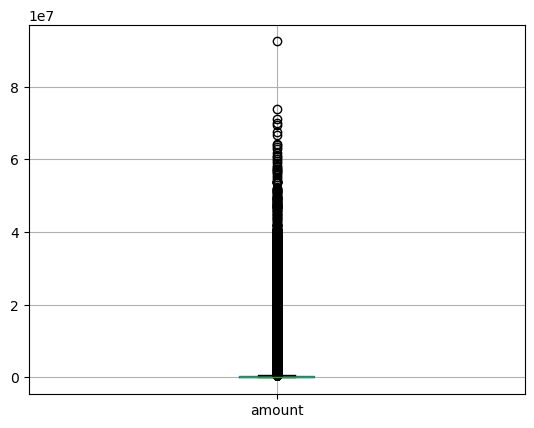

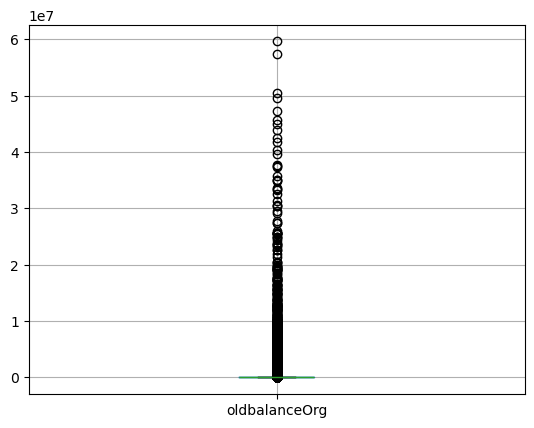

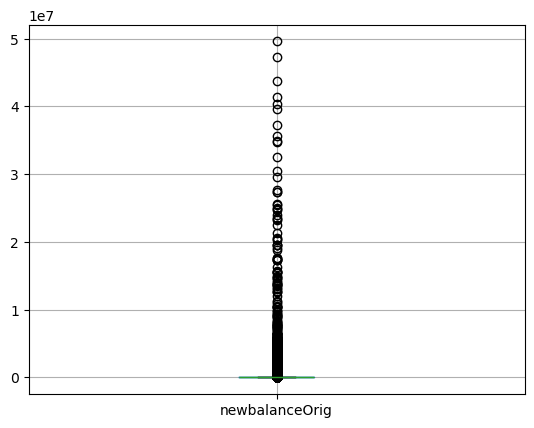

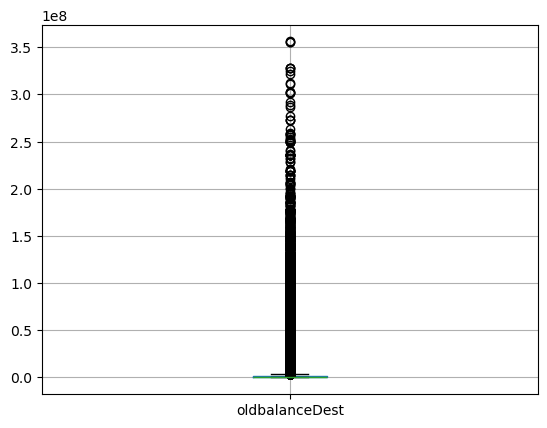

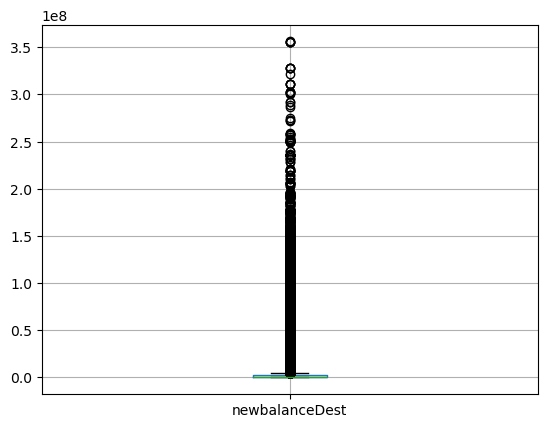

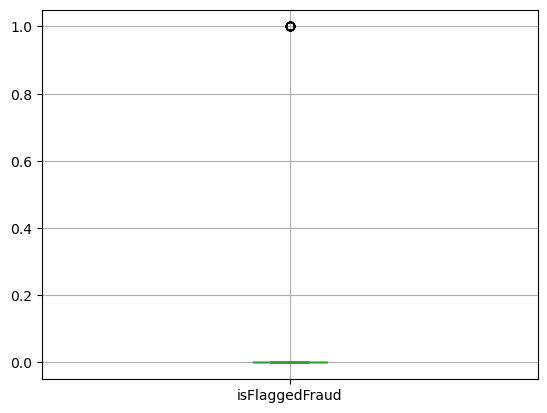

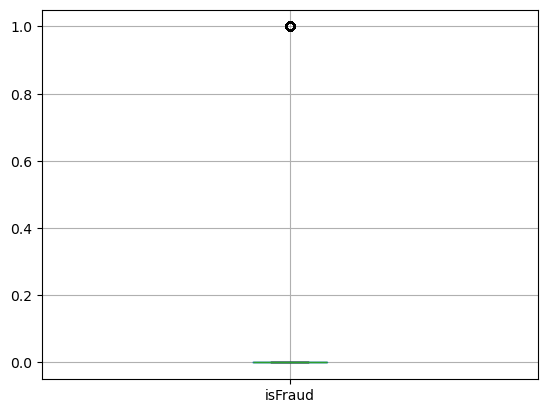

In [16]:
for i in df.columns:
    if df[i].dtype == 'int64' or df[i].dtype == 'float64':
        df.boxplot(column = i)
        plt.show()

In [17]:
# Only one True outlier detected rest of them are valid values(outliers). below is the code to drop the outlier

In [18]:
df[df["amount"] >= 80000000]
df.drop(df[df["amount"] >= 80000000].index,axis=0,inplace = True)

# Just checking with the available data that how many were markedFraud and where it was actully Fraud or not

In [19]:
df.groupby("isFlaggedFraud")["isFraud"].value_counts()

isFlaggedFraud  isFraud
0               0          2762195
                1             8136
1               1               16
Name: count, dtype: int64

In [20]:
df[df["type"]=="CASH_OUT"]

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
3,CASH_OUT,181.00,181.00,0.0,21182.00,0.00,0,1
15,CASH_OUT,229133.94,15325.00,0.0,5083.00,51513.44,0,0
42,CASH_OUT,110414.71,26845.41,0.0,288800.00,2415.16,0,0
47,CASH_OUT,56953.90,1942.02,0.0,70253.00,64106.18,0,0
48,CASH_OUT,5346.89,0.00,0.0,652637.00,6453430.91,0,0
...,...,...,...,...,...,...,...,...
6362611,CASH_OUT,63416.99,63416.99,0.0,276433.18,339850.17,0,1
6362613,CASH_OUT,1258818.82,1258818.82,0.0,503464.50,1762283.33,0,1
6362615,CASH_OUT,339682.13,339682.13,0.0,0.00,339682.13,0,1
6362617,CASH_OUT,6311409.28,6311409.28,0.0,68488.84,6379898.11,0,1


In [21]:
df.oldbalanceDest.value_counts()

oldbalanceDest
0.00           389259
10000000.00       602
20000000.00       219
30000000.00        86
40000000.00        31
                ...  
3279806.07          1
992711.24           1
162068.53           1
496468.82           1
6510099.11          1
Name: count, Length: 2360851, dtype: int64

# Checking for Unique values in each column

In [22]:
for i in df.columns:
    print({i:df[i].unique()})

{'type': array(['TRANSFER', 'CASH_OUT'], dtype=object)}
{'amount': array([1.81000000e+02, 2.29133940e+05, 2.15310300e+05, ...,
       3.39682130e+05, 6.31140928e+06, 8.50002520e+05])}
{'oldbalanceOrg': array([1.81000000e+02, 1.53250000e+04, 7.05000000e+02, ...,
       3.39682130e+05, 6.31140928e+06, 8.50002520e+05])}
{'newbalanceOrig': array([0.00000000e+00, 1.65032000e+04, 1.62075980e+05, ...,
       2.56745479e+07, 1.56745479e+07, 5.67454789e+06])}
{'oldbalanceDest': array([0.00000000e+00, 2.11820000e+04, 5.08300000e+03, ...,
       5.03464500e+05, 6.84888400e+04, 6.51009911e+06])}
{'newbalanceDest': array([      0.  ,   51513.44, 2719172.89, ...,  339682.13, 6379898.11,
       7360101.63])}
{'isFlaggedFraud': array([0, 1], dtype=int64)}
{'isFraud': array([1, 0], dtype=int64)}


# Checking Missing / Null Values

In [23]:
df.isnull().sum()

type              0
amount            0
oldbalanceOrg     0
newbalanceOrig    0
oldbalanceDest    0
newbalanceDest    0
isFlaggedFraud    0
isFraud           0
dtype: int64

# Just basic check on this two column because it has a lot of value as 0.

In [24]:
df['oldbalanceDest'].value_counts()

oldbalanceDest
0.00           389259
10000000.00       602
20000000.00       219
30000000.00        86
40000000.00        31
                ...  
3279806.07          1
992711.24           1
162068.53           1
496468.82           1
6510099.11          1
Name: count, Length: 2360851, dtype: int64

In [25]:
df['newbalanceDest'].value_counts()

newbalanceDest
0.00           16592
16532032.16       22
19169204.93       21
4743010.67        18
7364724.84        16
               ...  
1062618.70         1
1991821.27         1
202048.56          1
7226985.57         1
7360101.63         1
Name: count, Length: 2562843, dtype: int64

In [26]:
# df.drop(["oldbalanceDest","newbalanceDest"],axis=1, inplace = True)

## Converting Categorical data into Numerical as there is only one column with only two unique value i am prefering it doing mannualy otherwise i could have used label encoding. 

In [27]:
df.type.replace({"CASH_OUT":0,"TRANSFER":1}, inplace=True)

In [28]:
df = df.reset_index(drop=True)

In [29]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,1,181.00,181.0,0.0,0.0,0.00,0,1
1,0,181.00,181.0,0.0,21182.0,0.00,0,1
2,0,229133.94,15325.0,0.0,5083.0,51513.44,0,0
3,1,215310.30,705.0,0.0,22425.0,0.00,0,0
4,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,0


## Below commented code block is an automated approach for Converting Categorical data into Numerical

In [30]:
''' 
colname = []
for x in df.columns:
    if df[x].dtype== 'object':
        colname.append(x)
colname
'''

" \ncolname = []\nfor x in df.columns:\n    if df[x].dtype== 'object':\n        colname.append(x)\ncolname\n"

In [31]:
'''
# For preprocessing the data
# fit will create a dict with lables and transform will replace the value with lables
from sklearn.preprocessing import LabelEncoder
 
le=LabelEncoder()

for x in colname:
    df[x]=le.fit_transform(df[x])
    
'''

'\n# For preprocessing the data\n# fit will create a dict with lables and transform will replace the value with lables\nfrom sklearn.preprocessing import LabelEncoder\n \nle=LabelEncoder()\n\nfor x in colname:\n    df[x]=le.fit_transform(df[x])\n    \n'

In [32]:
df.head()

,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,isFraud
0,1,181.00,181.0,0.0,0.0,0.00,0,1
1,0,181.00,181.0,0.0,21182.0,0.00,0,1
2,0,229133.94,15325.0,0.0,5083.0,51513.44,0,0
3,1,215310.30,705.0,0.0,22425.0,0.00,0,0
4,1,311685.89,10835.0,0.0,6267.0,2719172.89,0,0


# Basic check before building model

In [33]:
df.dtypes

type                int64
amount            float64
oldbalanceOrg     float64
newbalanceOrig    float64
oldbalanceDest    float64
newbalanceDest    float64
isFlaggedFraud      int64
isFraud             int64
dtype: object

In [34]:
df = df.astype(int)

In [35]:
df.dtypes

type              int32
amount            int32
oldbalanceOrg     int32
newbalanceOrig    int32
oldbalanceDest    int32
newbalanceDest    int32
isFlaggedFraud    int32
isFraud           int32
dtype: object

## Cheking Multicollinearity, beacuse it was mentioned on task details otherwise in case of classification Multicollinearity will not affect the model performance and Predcition. And in this case Multicollinearity variable holds some important aspects while detecting Fraud and else only domain expert and Client can help with whether to deal with those variable or not.

In [36]:
# creating X and Y for Multicollinearity
X = df.iloc[:,0:-1]
Y = df.iloc[:,-1]

                    type    amount  oldbalanceOrg  newbalanceOrig  \
type            1.000000  0.327066       0.013766       -0.018727   
amount          0.327066  1.000000       0.114327        0.018378   
oldbalanceOrg   0.013766  0.114327       1.000000        0.790635   
newbalanceOrig -0.018727  0.018378       0.790635        1.000000   
oldbalanceDest  0.099791  0.308176      -0.020405       -0.012278   
newbalanceDest  0.157041  0.497527      -0.011461       -0.015437   
isFlaggedFraud  0.004924  0.012339       0.075420        0.123957   

                oldbalanceDest  newbalanceDest  isFlaggedFraud  
type                  0.099791        0.157041        0.004924  
amount                0.308176        0.497527        0.012339  
oldbalanceOrg        -0.020405       -0.011461        0.075420  
newbalanceOrig       -0.012278       -0.015437        0.123957  
oldbalanceDest        1.000000        0.970169       -0.000969  
newbalanceDest        0.970169        1.000000       -0.0

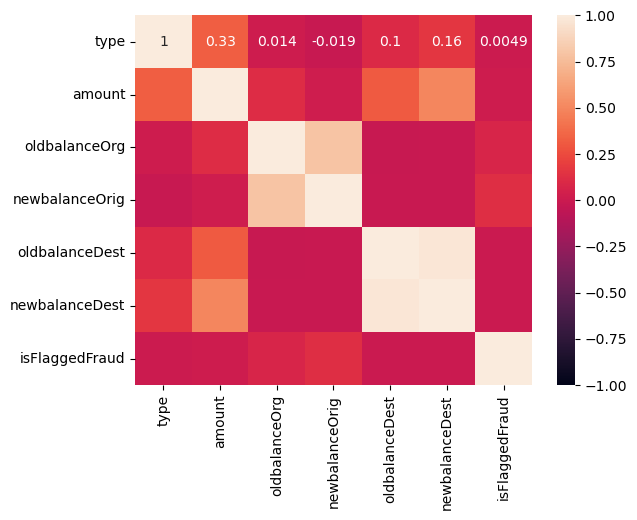

In [37]:
# Assumption of no multicollinearity: There should be no multicollinearity
# between the independent variables
# multicollinearity is the relationship amongst the multiple independent variables
corr_df=X.corr(method = "pearson")
print(corr_df)

sns.heatmap(corr_df,vmax=1.0,vmin=-1.0,annot=True)
plt.show()

## Creating X and Y variables in this case Y is "IsFraud" (Dependent Variable) and X is rest of the column (IV - Indepedent Variable)

In [38]:
X = df.values[:,0:-1]   # --> 0 to -2
Y = df.values[:,-1]

In [39]:
print(X.shape)
print(Y.shape)

(2770347, 7)
(2770347,)


## Scaling the Data for better prediction and understanding - Using Standardization - Standardscaler() because it is not affected by outliers

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

## Running a basic model

In [41]:
from sklearn.model_selection import train_test_split

# spliting the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.3, random_state=10)


In [42]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)
print("Percent of train data",X_train.shape[0]/X.shape[0]*100)

(1939242, 7)
(1939242,)
(831105, 7)
(831105,)
Percent of train data 69.99996751309493


In [43]:
from sklearn.linear_model import LogisticRegression
# creating a model object
classifier = LogisticRegression()
# Training the model object
classifier.fit(X_train, Y_train)

# printing intercept and coefficient
print(classifier.intercept_)
print(classifier.coef_)

[-15.28962777]
[[  0.66501582 -27.12440237  10.23264635  -6.7724992   14.03889402
  -16.9015604    0.9221742 ]]


In [44]:
print(list(zip(df.columns[0:-1], classifier.coef_.ravel())))

[('type', 0.6650158172299208), ('amount', -27.124402374193235), ('oldbalanceOrg', 10.232646346585353), ('newbalanceOrig', -6.772499196570977), ('oldbalanceDest', 14.038894023466389), ('newbalanceDest', -16.90156040409434), ('isFlaggedFraud', 0.9221741952611013)]


In [45]:
# predicting using the model
Y_pred = classifier.predict(X_test)
print(Y_pred)

[0 0 0 ... 0 0 0]


## This will show how to values are being predicted in backend using Hypothesis or 0.5 as a threshold. we can change this threshold as per our requirement and priority factor

In [46]:
Y_pred_prob = classifier.predict_proba(X_test)
Y_pred_prob

array([[9.99999889e-01, 1.11243795e-07],
       [9.99923168e-01, 7.68324575e-05],
       [9.98909182e-01, 1.09081824e-03],
       ...,
       [9.95279103e-01, 4.72089697e-03],
       [9.99999169e-01, 8.30962048e-07],
       [9.99567093e-01, 4.32906771e-04]])

# Creating Confusion matrix

# Note :- 
- firstly when I've created this model without removing the data where "Type" column value is not "CASH_OUT" or "TRANSFER". which does not make any sense in this data for prediction of fraud. 
- And eairlier the confusion matrix was very poor and Type 2 error was also high (which is class of Importance). and F1 score and recall was very low for our priority class which is class 1. because its important to catch Fraud rather then identifying Non_Fraud. 
- But after lots of trial i finally understand the problem and got some better results with less error and more Accuracy

In [47]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,Y_pred)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,Y_pred))
 
acc=accuracy_score(Y_test, Y_pred)
print("Accuracy of the model: ",acc)

[[828580    150]
 [  1309   1066]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828730
           1       0.88      0.45      0.59      2375

    accuracy                           1.00    831105
   macro avg       0.94      0.72      0.80    831105
weighted avg       1.00      1.00      1.00    831105

Accuracy of the model:  0.998244505808532


## Tuning this model by adjusting the Threshold value 

In [48]:
# store the predicted probability
y_pred_prob = classifier.predict_proba(X_test)
print(y_pred_prob)

[[9.99999889e-01 1.11243795e-07]
 [9.99923168e-01 7.68324575e-05]
 [9.98909182e-01 1.09081824e-03]
 ...
 [9.95279103e-01 4.72089697e-03]
 [9.99999169e-01 8.30962048e-07]
 [9.99567093e-01 4.32906771e-04]]


## This 0.4 threshold is considered after checking multiple threshold value and also after checking the AUC(Area Under the Curve) for the confusing or similer threshold values

In [49]:
y_pred_class=[]
for value in y_pred_prob[:,1]:
    if value > 0.41:
        y_pred_class.append(1)
    else:
        y_pred_class.append(0)
#print(y_pred_class)

## After changing threshold value to 0.4 both the recall by 2% and F1-score by 1% increased

In [50]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
 
cfm=confusion_matrix(Y_test,y_pred_class)
print(cfm)
 
print("Classification report: ")
 
print(classification_report(Y_test,y_pred_class))
 
acc=accuracy_score(Y_test, y_pred_class)
print("Accuracy of the model: ",acc)

[[828532    198]
 [  1262   1113]]
Classification report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828730
           1       0.85      0.47      0.60      2375

    accuracy                           1.00    831105
   macro avg       0.92      0.73      0.80    831105
weighted avg       1.00      1.00      1.00    831105

Accuracy of the model:  0.9982433025911287


# In Logistic Regression model we got Accuracy of :- 0.9982601476347754 %

## Below code is to check Threshold values with there total Error and Type 1, Type 2 Error

In [51]:
for a in np.arange(0.4,0.61,0.01):
    predict_mine = np.where(y_pred_prob[:,1] > a, 1, 0)
    cfm=confusion_matrix(Y_test, predict_mine)
    total_err=cfm[0,1]+cfm[1,0]
    print("Errors at threshold ", a, ":",total_err, " , type 2 error :", 
          cfm[1,0]," , type 1 error:", cfm[0,1])

Errors at threshold  0.4 : 1462  , type 2 error : 1258  , type 1 error: 204
Errors at threshold  0.41000000000000003 : 1460  , type 2 error : 1262  , type 1 error: 198
Errors at threshold  0.42000000000000004 : 1464  , type 2 error : 1271  , type 1 error: 193
Errors at threshold  0.43000000000000005 : 1462  , type 2 error : 1274  , type 1 error: 188
Errors at threshold  0.44000000000000006 : 1460  , type 2 error : 1281  , type 1 error: 179
Errors at threshold  0.45000000000000007 : 1459  , type 2 error : 1287  , type 1 error: 172
Errors at threshold  0.4600000000000001 : 1454  , type 2 error : 1288  , type 1 error: 166
Errors at threshold  0.4700000000000001 : 1455  , type 2 error : 1293  , type 1 error: 162
Errors at threshold  0.4800000000000001 : 1455  , type 2 error : 1295  , type 1 error: 160
Errors at threshold  0.4900000000000001 : 1460  , type 2 error : 1302  , type 1 error: 158
Errors at threshold  0.5000000000000001 : 1459  , type 2 error : 1309  , type 1 error: 150
Errors at

# here i checked the AUC(Area Under the Curve) value for selecting the best threshold with highest AUC value.

In [52]:
from sklearn import metrics
 
fpr, tpr, z = metrics.roc_curve(Y_test, y_pred_class)
auc = metrics.auc(fpr,tpr)
 
print(auc)
print(fpr)
print(tpr)

0.7341963295772161
[0.00000000e+00 2.38919793e-04 1.00000000e+00]
[0.         0.46863158 1.        ]


## After this i used StratifiedKFold method to check if the Accuracy score is approximatly near as StratifiedKFold method values. By applying Cross-Validation technique it also showed that the data is not overfitted or underfitted

# StratifiedKFold

In [53]:
#Using cross validation
 
classifier=LogisticRegression()
 
#performing kfold_cross_validation
from sklearn.model_selection import StratifiedKFold
kfold_cv=StratifiedKFold(n_splits=10,random_state=10,shuffle=True)
#print(kfold_cv)
 
from sklearn.model_selection import cross_val_score
#running the model using scoring metric as accuracy
kfold_cv_result=cross_val_score(estimator=classifier,X=X_train,
                                                 y=Y_train, cv=kfold_cv)
print(kfold_cv_result)
#finding the mean
print(kfold_cv_result.mean())

[0.99826737 0.99812814 0.99815907 0.99822095 0.99818486 0.99820033
 0.99835503 0.99825705 0.9981436  0.9982983 ]
0.9982214700627494


In [54]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
  
# training the model
dt.fit(X_train, Y_train)
  
Y_pred = dt.predict(X_test)

In [55]:
# classification report
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[828460    270]
 [   279   2096]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828730
           1       0.89      0.88      0.88      2375

    accuracy                           1.00    831105
   macro avg       0.94      0.94      0.94    831105
weighted avg       1.00      1.00      1.00    831105

0.9993394336455682


# Decision Tree model

## Applying Decision Tree classifier

# Creating X and Y 

In [56]:
X=df.values[:,:-1]
Y=df.values[:,-1]

# Scaling the data

In [57]:
from sklearn.preprocessing import StandardScaler

scaler= StandardScaler()

scaler.fit(X)

X= scaler.transform(X)

# Traning model

In [58]:
from sklearn.model_selection import train_test_split
  
# spliting into 70:30 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, 
                                                    random_state = 10)

# Applying SMOTE (Synthetic Minority Over-sampling Technique) to train the model by giving equal class of importance to both the classes. by creating a synthetic sample value(assumed values) for class 1.

In [59]:
print("Before OverSampling, counts of label '1': ", (sum(Y_train == 1)))
print("Before OverSampling, counts of label '0': ", (sum(Y_train == 0)))
  
# import SMOTE from imblearn library
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state = 10,k_neighbors=5)
X_train_res, Y_train_res = sm.fit_resample(X_train, Y_train)
  
print('After OverSampling, the shape of train_X: ', (X_train_res.shape))
print('After OverSampling, the shape of train_y: ', (Y_train_res.shape))
  
print("After OverSampling, counts of label '1': ", (sum(Y_train_res == 1)))
print("After OverSampling, counts of label '0': ", (sum(Y_train_res == 0)))

Before OverSampling, counts of label '1':  5777
Before OverSampling, counts of label '0':  1933465
After OverSampling, the shape of train_X:  (3866930, 7)
After OverSampling, the shape of train_y:  (3866930,)
After OverSampling, counts of label '1':  1933465
After OverSampling, counts of label '0':  1933465


In [60]:
from sklearn.tree import DecisionTreeClassifier

dt=DecisionTreeClassifier()
  
# training the model
dt.fit(X_train_res, Y_train_res)
  
Y_pred = dt.predict(X_test)

In [61]:
print(Y_pred.shape)
print(Y_test.shape)

(831105,)
(831105,)


In [62]:
# classification report
print(confusion_matrix(Y_test,Y_pred))
print(classification_report(Y_test, Y_pred))
print(accuracy_score(Y_test, Y_pred))

[[827219   1511]
 [    68   2307]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    828730
           1       0.60      0.97      0.75      2375

    accuracy                           1.00    831105
   macro avg       0.80      0.98      0.87    831105
weighted avg       1.00      1.00      1.00    831105

0.9981001197201317


# Final Conclusion :-

## We can use DecisionTreeClassifier() model to predict Whether the Transaction is Fraud or not Fraud. With The Accuracy Score of :- 99%
## Because F1- score and recall value for both the classes is Good and there is no overfitting or unfitting scenerio. 
## Eairlier the model was over fitting for class 0, beacuse we had very less data or observation of class 1 ( IsFraud- class of importance ). Thats why i balanced the data for both the classes.

# Candidate Expectations
### Your task is to execute the process for proactive detection of fraud while answering following
questions.
1. Data cleaning including missing values, outliers and multi-collinearity.
2. Describe your fraud detection model in elaboration.
3. How did you select variables to be included in the model?
4. Demonstrate the performance of the model by using best set of tools.
5. What are the key factors that predict fraudulent customer?
6. Do these factors make sense? If yes, How? If not, How not?
7. What kind of prevention should be adopted while company update its infrastructure?
8. Assuming these actions have been implemented, how would you determine if they work?

# 1. Data cleaning including missing values, outliers and multi-collinearity.
### Missing values
- In this data there was no missing value as such, yes there was a perticual merchent whose values for old and new balance were missing and it was 0. but i did not handled those missing values because only client can give me clear understanding of that those missing value (why, what etc). So i cant just blindly use measure of central tendency to deal with those missing value or remove them as it will be a loss of huge data. it will become a manupulated data which we dont want.
### Outliers - 
- There is only one actual outlier detected in Amount where the amount of transaction was to high and it was genuine(Not Fraud). Rest of them we cannot consider them as outliers as they are important as per domain knowledge and Fraud detection. So we can keep those outliers as classification model does not get affected by Outliers.
### multi-collinearity
- There was multi-collinearity found in 4 variiables 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest','newbalanceDest' but we cannot deal or remove those variable because those are valid and important for correct prediction.
- And in this case Multicollinearity variable holds some important aspects while detecting Fraud and else only domain expert and Client can help with whether to deal with those variable or not.

# 2. Describe your fraud detection model in elaboration.
### Problem Understanding
- Fraud detection aims to identify fraudulent transactions from a pool of genuine transactions. The primary challenge was that fraud cases are usually rare compared to genuine cases, leading to class imbalance. my goal was to accurately classify transactions to minimize false positives (genuine transactions flagged as fraud) and false negatives (fraudulent transactions missed).


### Data Preprocessing
Preprocessing involves cleaning and transforming the data to make it suitable for model training.

### Handling Missing Values
- Fill or drop missing values. Imputation methods can be used to fill missing values based on the feature type (mean/median for numerical, mode for categorical).
- but in this case it was performed because we cant manuplulate the without clients approval or clear understanding as per my knowledge that was not causing any problem and genuine.

### Encoding Categorical Variables
- Converted categorical variables into numerical values using mannual encoding, because value was less. we can also used techniques like label encoding.

### Scaling Features
- we used Standardization to ensure they data is on a similar scale.

### Exploratory Data Analysis (EDA)
- Performed EDA to understand the data distribution.info, describe, shape, Boxplot and heatmap etc.


### Feature Engineering
- In this step i removed some X variables which was not vaild or important for Fraud detection


### Handling Imbalanced Data - in our case class was highly imbalanced
- Address class imbalance to ensure the model is not biased towards the majority class (genuine transactions).
- In this step we used Threshold value for balancing the class and also SMOTE (Synthetic Minority Over-sampling Technique)


### Model Selection
- Choosed a classification model
- Logistic Regression: Useful for its simplicity and interpretability, though it may struggle with complex patterns.
- Decision Trees: Can capture non-linear relationships and are easy to interpret.
- we used both logistic Regression and Decision Tree both the model are showing great result we can use any one of them. but as per class of importance (isfraud). we should go with decision tree model.

### Model Training and Evaluation
- Train-Test Split
- Divided the data into training and testing sets, using an 70-30 split.


### Model Evaluation
- Evaluated the model using confusion metrics that consider class imbalance:
* Precision: The ratio of correctly predicted positive observations to the total predicted positives.
* Recall: The ratio of correctly predicted positive observations to all observations in the actual class.
* F1-Score: The harmonic mean of precision and recall, providing a balance between the two.
* ROC-AUC Score: Measures the ability of the model to distinguish between classes. A higher AUC indicates better performance.

# 3. How did you select variables to be included in the model?
- I selected vriables as per domain knowledge and after carefully analysing the data i understand some pointers.
1. That only Transaction Type which are Cash_out and Transfer are the case where fraud is happening.
2. Droping "Step" column because its only number series which will not affect the model performance or prediction
3. Droping "nameOrig" and "nameDest" because it contain unique value like some kind of ID which is not important also not affect the model performance or prediction.

# 4. Demonstrate the performance of the model by using best set of tools.
- The confusion matrix helps to understand the distribution of true positive, true negative, false positive, and false negative predictions. The classification report gives a detailed breakdown of precision, recall, F1-score, and support for each class. The ROC curve illustrates the model's ability to discriminate between fraud and non-fraud transactions across different thresholds. Overall, these tools help assess the model's effectiveness in identifying fraudulent transactions and provide guidance for further improvements if needed.
- Evaluated the model using confusion metrics that consider class imbalance:
####  Precision: The ratio of correctly predicted positive observations to the total predicted positives.
* For class 0:- 1
* For class 1:- 0.61
#### Recall: The ratio of correctly predicted positive observations to all observations in the actual class.
* For class 0:- 1
* For class 1:- 0.97
#### F1-Score: The harmonic mean of precision and recall, providing a balance between the two.
* For class 0:- 1
* For class 1:- 0.75
#### ROC-AUC Score: Measures the ability of the model to distinguish between classes. A higher AUC indicates better performance.
* This is the highest AUC we got :- 0.7341963295772161 for 0.4 Threshold value.
#### Accuracy
* Accuracy Score :- 99%

# 5. What are the key factors that predict fraudulent customer?
- In our case Transaction Type was most important for detection of Fraud.
- Other key factors are :-
- Transaction Amount
- Transaction Type
- Historical Pattern like oldbalance, newbalance etc

# 6. Do these factors make sense? If yes, How? If not, How not?
#### Transaction Type :- CASH_IN, CASH_OUT,DEBIT, PAYMENT, TRANSFER 
* Out of 6362620 records fraud is done on perticual "Type" that is CASH_OUT and TRANSFER. It indicates that this Type of transaction is important while predicting Fraud.
#### Transaction Amount:-
* Unusually large or small transaction amounts can indicate fraudulent behavior. Monitoring transaction amounts helps identify suspicious transactions that deviate from normal spending patterns.
#### oldbalanceOrg' (Old Origin Account Balance) and 'newbalanceOrig' (New Origin Account Balance):- 
* These features represent the balance of the origin account before and after the transaction, So, Significant changes in these balances may indicate suspicious activity, such as large withdrawals or transfers. Monitoring changes in account balances helps detect abnormal transaction behavior and potential fraud, such as account takeover or unauthorized transfers.
#### 'oldbalanceDest' (Old Destination Account Balance) and 'newbalanceDest' (New Destination Account Balance):-
* Similar to origin account balances, these features represent the balance of the destination account before and after the transaction, respectively. Unusual changes in these balances may signal fraudulent activity, such as unexpected deposits or transfers. Monitoring changes in destination account balances helps identify suspicious transactions, such as money laundering or account manipulation.

# 7. What kind of prevention should be adopted while company update its infrastructure?
- Company should update its infrastructure in such a way in which when any transaction which is huge. Then they should inform the owner about such transaction and take conformation from the owner before compeleting the transaction.
- Provide training to employees on security practices, on how to recognize(like where transaction type is Cash_out and Transfer and also amount is Huge and does not match with historical data) and respond to potential security threats.
- Feedback:- Collect feedbacks and we can update and train the model accordingly based on Current senario and trends.
- Continue monitoring - it will help us to understand current senerios and current Fraudulent trends. which can be used to update or train model again for batter performance.

# 8. Assuming these actions have been implemented, how would you determine if they work?
- It will surely work as this are best practices and its been already followed by many financial institutions.
- By continue monitoring and evaluating these points and feedback, you can assess the effectiveness of the implemented ideas and make decisions about adjustments or improvements. Continuous improvement is important to maintaining a strong security and effectively calculating risks in the rapidly evolving threat landscape.